In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.gridspec as gridspec

In [2]:
# Checking Controllability
def contrability(A,B):
    rows = len(A)
    columns = len(B)
    for i in range(columns):
        if i ==0:
            c = B
            
        else:
            c_add = np.linalg.matrix_power(A, i).dot(B)
            c = np.hstack((c,c_add))
    rank = np.linalg.matrix_rank(c)
    if rank<rows:
        print('Is not contrallble')
    else:
        print('Contrable')  

In [3]:
# contrallability 1
A = np.array([[0.5,0,0.5],[0,0,-2],[4,2,1]])
B = np.array([[0,0],[1,0],[0,1]])
contrability(A,B)


Contrable


In [4]:
# contrallability 2
A = np.array([[0.5,0,0.5],[0,0,-0.5],[0.5,0.5,0.5]])
B = np.array([[0,0],[1,0],[0,1]])
contrability(A,B)


Contrable


In [5]:
# contrallability 3
A = np.array([[2,0,0],[0,0,-2],[1,1,0]])
B = np.array([[0,0],[1,0],[0,1]])
contrability(A,B)

Is not contralble


In [11]:
# Function for gains and cost
def LQR(A,B,Q,R,N):
    n = N
    K_list=[]
    P_list=[Q]
    P=Q
    while n > 0:
        n= n-1
        K= -(np.linalg.inv((((B.transpose()).dot(P)).dot(B))+R)).dot(B.transpose()).dot(P).dot(A)
        P = Q + A.transpose().dot(P).dot(A)+A.transpose().dot(P).dot(B).dot(K)
        K_list.append(K)
        P_list.append(P)
    K_list_rev = K_list[::-1]
    P_list_rev = P_list[::-1]
    return K_list_rev, P_list_rev

In [12]:
# Function calculates X states and U controls
def Cal(K_list_rev,A,B,X):
    X_list = [X]
    U_list = []
    for i in K_list_rev:
        U = i.dot(X)
        U_list.append(U)
        X = A.dot(X)+B.dot(U)
        X_list.append(X)
    return X_list,U_list

In [20]:
# function for plotting the states and controls
def fplot(X_list,U_list):
    X1_l = []
    X2_l = []
    X3_l = []
    for i in range (len(X)):

        for j in range(len(X_list)):
            if i == 0:
                X1 = X_list[j][i]
                X1_l.append(X1)
            if i == 1:
                X2 = X_list[j][i]
                X2_l.append(X2)
            if i == 2:
                X3 = X_list[j][i]
                X3_l.append(X3)
        U1_l = []
        U2_l = []
    for i in range(len(U_list[0])):

        for j in range(len(U_list)):
            if i == 0:
                U1 = U_list[j][i]
                U1_l.append(U1)
            if i == 1:
                U2 = U_list[j][i]
                U2_l.append(U2)
    gridspec.GridSpec(5,3)
    plt.subplot2grid((5,3), (0,0), colspan=2, rowspan=3)
    plt.plot(np.arange(0, N+1),X1_l, 'r--', np.arange(0, N+1), X2_l, 'bs', np.arange(0, N+1), X3_l, 'g^')
    plt.title('Xn')
    plt.xlabel('X1,X2,X3')
    plt.ylabel('N')
    plt.subplot2grid((5,3),(0,2))
    plt.plot(np.arange(0, N+1),X1_l, 'r--')
    plt.title('X1')
    plt.xlabel('X1')
    plt.ylabel('N')
    plt.subplot2grid((5,3),(1,2))
    plt.plot(np.arange(0, N+1), X2_l, 'bs')
    plt.title('X2')
    plt.xlabel('X2')
    plt.ylabel('N')
    plt.subplot2grid((5,3),(2,2))
    plt.plot(np.arange(0, N+1), X3_l, 'g^')
    plt.title('X3')
    plt.xlabel('X3')
    plt.ylabel('N')
    plt.subplot2grid((5,3),(3,0), colspan=2, rowspan=2)
    plt.plot(np.arange(0, N),U1_l, 'r--',np.arange(0, N), U2_l, 'g^')
    plt.title('Un')
    plt.xlabel('U1,U2')
    plt.ylabel('N')
    plt.subplot2grid((5,3),(3,2))
    plt.plot(np.arange(0, N),U1_l, 'r--')
    plt.title('U1')
    plt.xlabel('U1')
    plt.ylabel('N')
    plt.subplot2grid((5,3),(4,2))
    plt.plot(np.arange(0, N),U2_l, 'g^')
    plt.title('U2')
    plt.xlabel('U2')
    plt.ylabel('N')

The optimal cost is [[49663.70338892]]


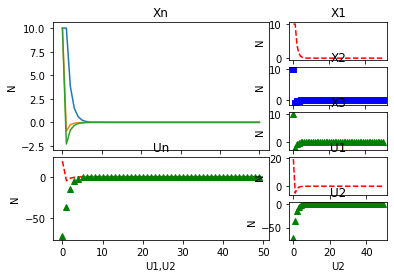

In [33]:
# for 1 )
A = np.array([[0.5,0,0.5],[0,0,-2],[4,2,1]])
B = np.array([[0,0],[1,0],[0,1]])
Q = np.array([[100, 0, 0],[0,100,0],[0,0,100]])
R = np.array([[1, 0],[0,1]])
X = np.array([[10],[10],[10]])
N = 50 # inifinte horizon case we can see the gains stabilizing
K_list_rev,P_list_rev = LQR(A,B,Q,R,N)
X_list,U_list = Cal(K_list_rev,A,B,X)
fplot(X_list,U_list)
J = X.transpose().dot(P_list_rev[0]).dot(X)
print('The optimal cost is', J)

The optimal cost is [[42712.36912877]]


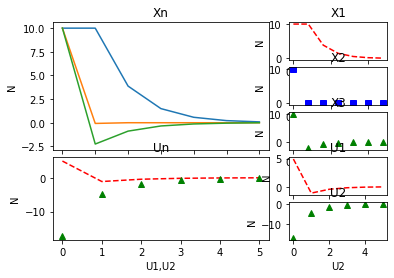

In [36]:
# for 2 )
A = np.array([[0.5,0,0.5],[0,0,-0.5],[0.5,0.5,0.5]])
B = np.array([[0,0],[1,0],[0,1]])
Q = np.array([[100, 0, 0],[0,100,0],[0,0,100]])
R = np.array([[1, 0],[0,1]])
X = np.array([[10],[10],[10]])
N = 6 # finte horizon case
K_list_rev,P_list_rev = LQR(A,B,Q,R,N)
X_list,U_list = Cal(K_list_rev,A,B,X)
fplot(X_list,U_list)
J = X.transpose().dot(P_list_rev[0]).dot(X)
print('The optimal cost is', J)

The optimal cost is [[2.14783598e+64]]


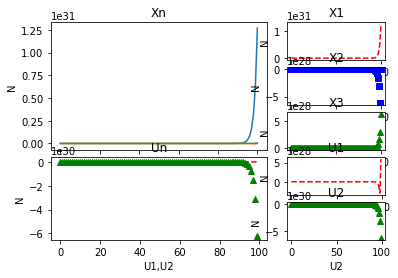

In [35]:
# for 2 )
A = np.array([[2,0,0],[0,0,-2],[1,1,0]])
B = np.array([[0,0],[1,0],[0,1]])
Q = np.array([[100, 0, 0],[0,100,0],[0,0,100]])
R = np.array([[1, 0],[0,1]])
X = np.array([[10],[10],[10]])
N = 100 # infinte horizon case
K_list_rev,P_list_rev = LQR(A,B,Q,R,N)
X_list,U_list = Cal(K_list_rev,A,B,X)
fplot(X_list,U_list)
J = X.transpose().dot(P_list_rev[0]).dot(X)
print('The optimal cost is', J)